## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from deap import tools

from src.data import load_dataset
from src.ga import run_petrinas_ga

## Configuration

In [2]:
N_PLACES = 12
N_TRANSITIONS = 12

WEIGHT = 0.9
TRANSITIONS = [ 
    "Receiving Request", 
    "First Assessment", 
    "Fraud Check",  
    "Invisible 2", 
    "Invisible 1",
    "Accept", 
    "Decline", 
    "Create Offer", 
    "Contact Customer", 
    "Offer Refused", 
    "Draw Contract", 
    "Send Contract", 
]

# Load in dataset
dataset = load_dataset(filepath="data/traces.txt", transitions=TRANSITIONS)

## Exercise 1

In [3]:
outputs_1 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=[
        {"function": tools.cxTwoPoint},
    ],
    mutation_ops=[
        {"function": tools.mutFlipBit, "indpb": 0.1},
    ],
    selection_ops=[
        {"function": tools.selTournament, "tournsize": 5},
    ],
    crossover_probs=[0.5],
    mutation_probs=[0.5],
    n_individuals=500,
    n_generations=50,
    n_iterations=1,
)

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 1/1 [00:09<00:00,  9.91s/it]

Best fitness: 554.4000000000001
Average best fitness: 554.4000000000001



### Plot fitness at each generation

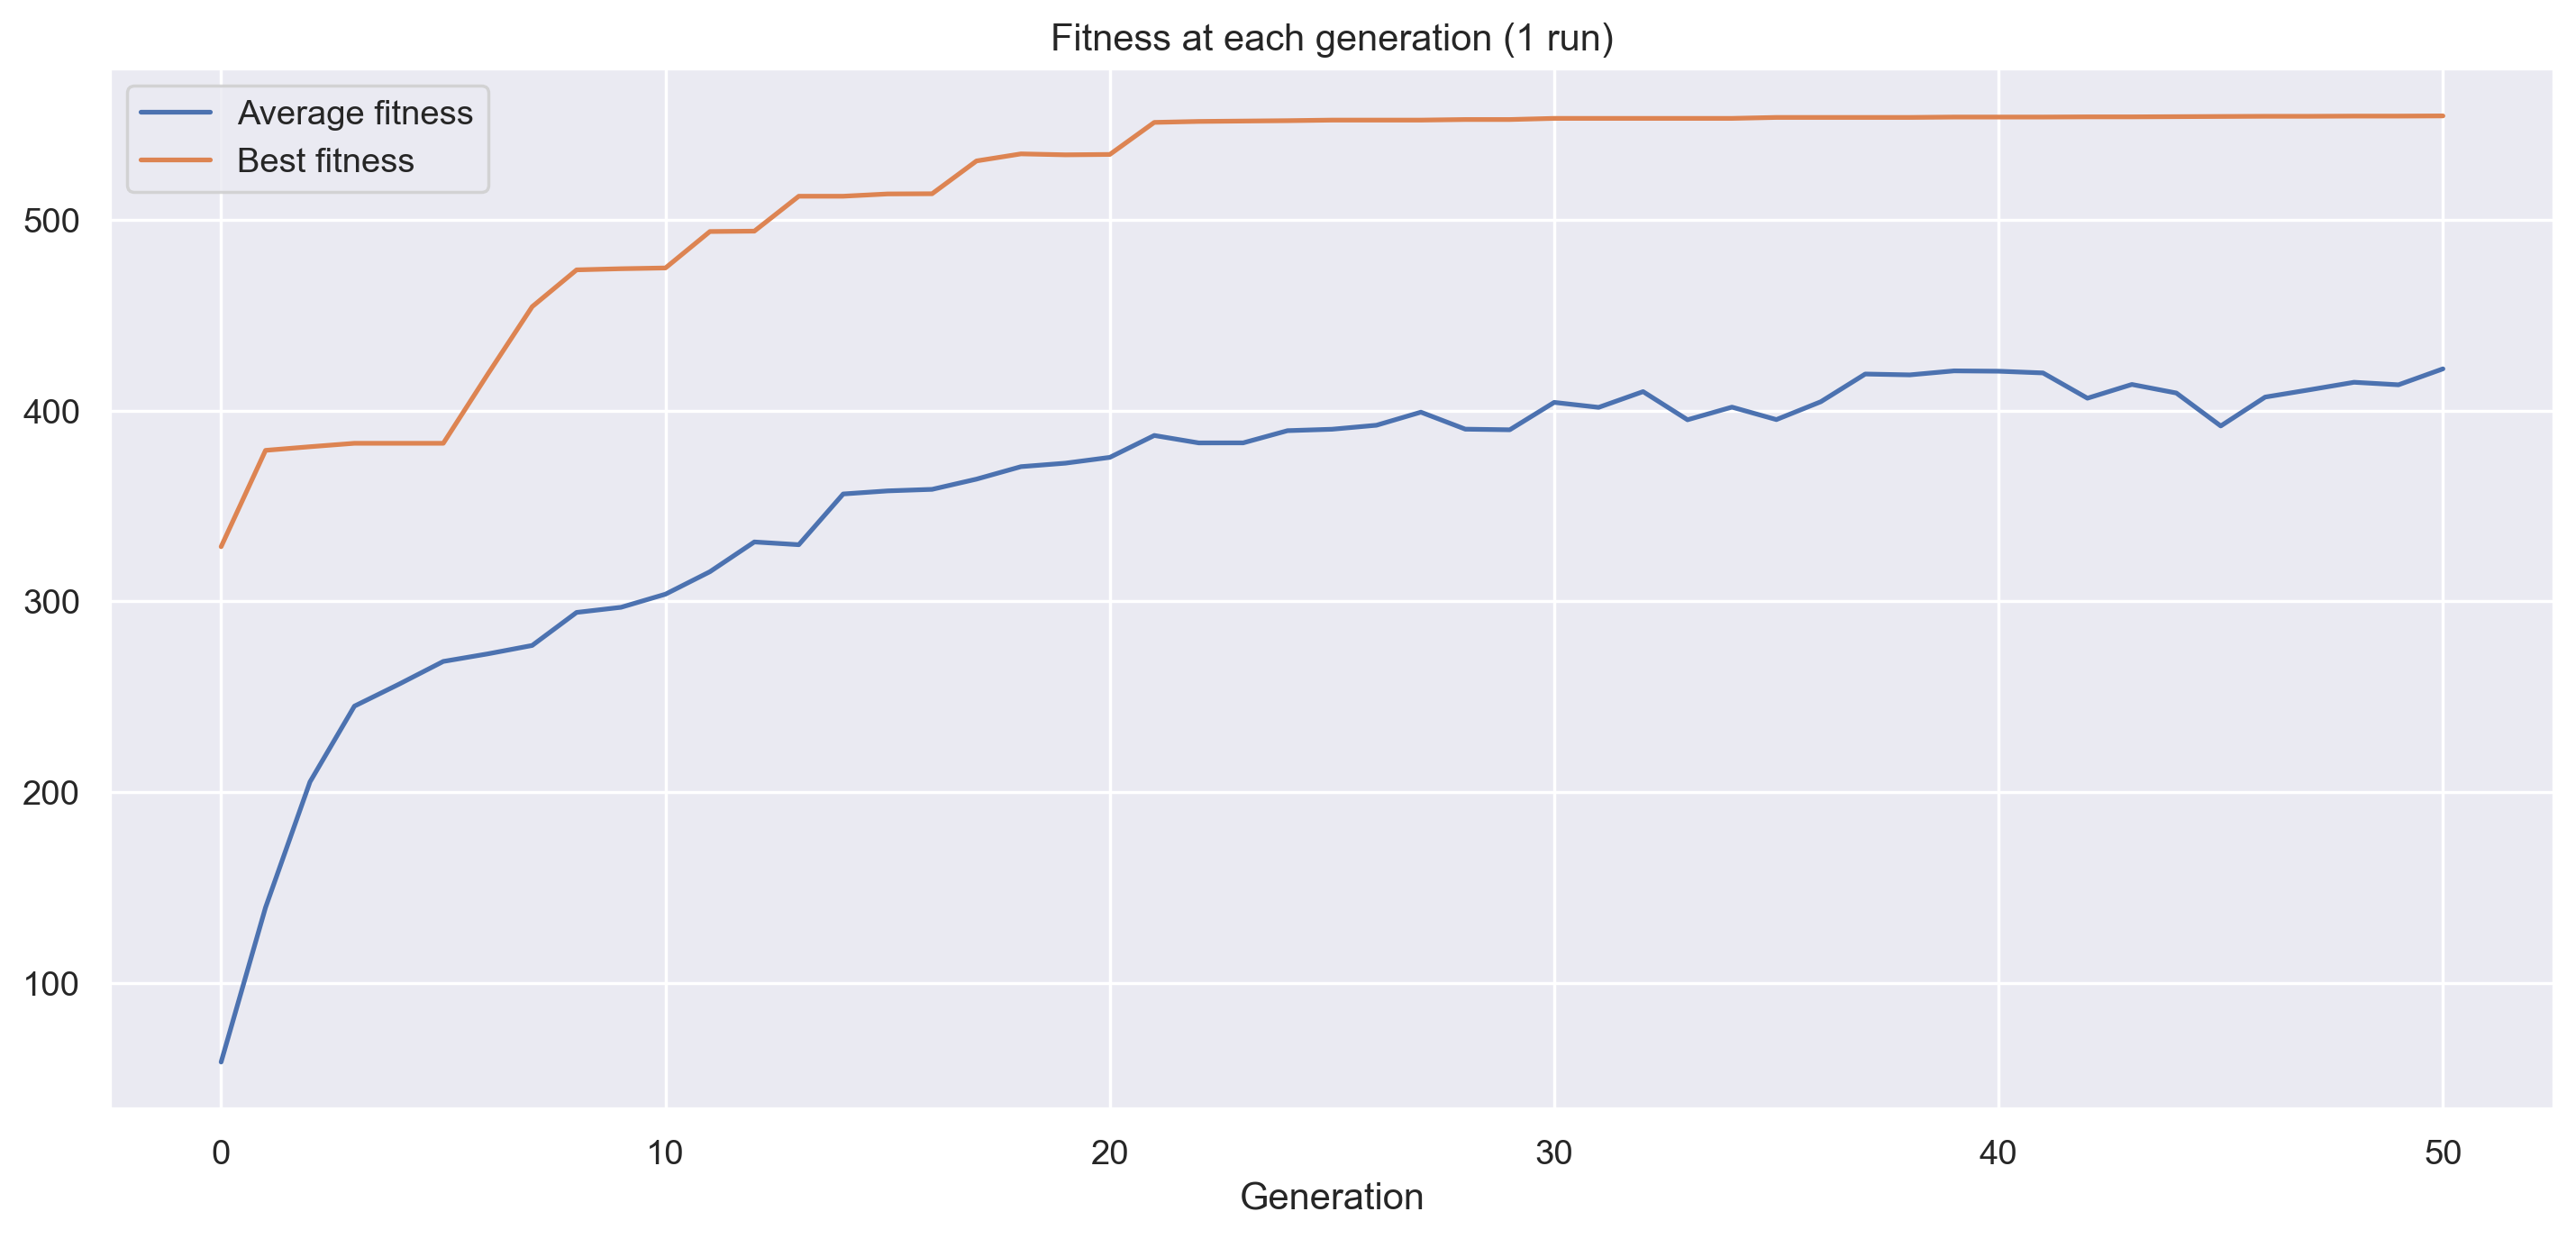

In [5]:
fig, ax = plt.subplots(dpi=250, figsize=(14, 6))
avg_fitness = outputs_1[0]["logbook"].select("avg")
best_fitness = outputs_1[0]["logbook"].select("max")
ax.plot(avg_fitness, label="Average fitness")
ax.plot(best_fitness, label="Best fitness")
ax.set_title("Fitness at each generation (1 run)")
ax.set_xlabel("Generation")
ax.legend()
fig.savefig("plots/exercise-1-fitness.png", bbox_inches="tight")

## Exercise 2

In [3]:
crossover_ops=[
    {"function": tools.cxTwoPoint},
    {"function": tools.cxOrdered},
]
mutation_ops=[
    {"function": tools.mutFlipBit, "indpb": 0.1},
    {"function": tools.mutShuffleIndexes, "indpb": 0.1},
]
selection_ops=[
    {"function": tools.selTournament, "tournsize": 5},
    {"function": tools.selRoulette},
]

outputs_2 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=crossover_ops,
    mutation_ops=mutation_ops,
    selection_ops=selection_ops,
    crossover_probs=[0.5],
    mutation_probs=[0.5],
    n_individuals=500,
    n_generations=50,
    n_iterations=30,
)

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [06:26<00:00, 12.89s/it]


Best fitness: 556.2
Average best fitness: 518.3366666666668

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selRoulette
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [05:28<00:00, 10.96s/it]


Best fitness: 512.2
Average best fitness: 437.19333333333327

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [06:36<00:00, 13.21s/it]


Best fitness: 557.1
Average best fitness: 551.4266666666667

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selRoulette
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [05:37<00:00, 11.25s/it]


Best fitness: 554.9000000000001
Average best fitness: 537.7433333333333

Crossover op: cxOrdered
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [06:51<00:00, 13.71s/it]


Best fitness: 556.4000000000001
Average best fitness: 528.3866666666667

Crossover op: cxOrdered
Mutation op: mutFlipBit
Selection op: selRoulette
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [05:41<00:00, 11.38s/it]


Best fitness: 513.3000000000001
Average best fitness: 425.06333333333345

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [07:17<00:00, 14.59s/it]


Best fitness: 557.1
Average best fitness: 557.0066666666668

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selRoulette
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [06:06<00:00, 12.22s/it]

Best fitness: 554.4000000000001
Average best fitness: 528.2933333333333



### Make table of performance of each combination

In [61]:
print(
    "CROSSOVER".ljust(10),
    "MUTATION".ljust(17),
    "SELECTION".ljust(13),
    "ABF".ljust(6),
    "TIME".ljust(7),
)

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            abf = np.mean([run["best_fitness"] for run in runs])
            running_time = np.mean([run["running_time"] for run in runs])

            print(
                crossover_op["function"].__name__.ljust(10),
                mutation_op["function"].__name__.ljust(17),
                selection_op["function"].__name__.ljust(13),
                f"{abf:.5}".ljust(6),
                f"{running_time:.5}".ljust(7),
            )

CROSSOVER  MUTATION          SELECTION     ABF    TIME   
cxTwoPoint mutFlipBit        selTournament 518.34 12.795 
cxTwoPoint mutFlipBit        selRoulette   437.19 10.877 
cxTwoPoint mutShuffleIndexes selTournament 551.43 13.126 
cxTwoPoint mutShuffleIndexes selRoulette   537.74 11.171 
cxOrdered  mutFlipBit        selTournament 528.39 13.624 
cxOrdered  mutFlipBit        selRoulette   425.06 11.292 
cxOrdered  mutShuffleIndexes selTournament 557.01 14.502 
cxOrdered  mutShuffleIndexes selRoulette   528.29 12.133 


### Make plot of ABF of each combination

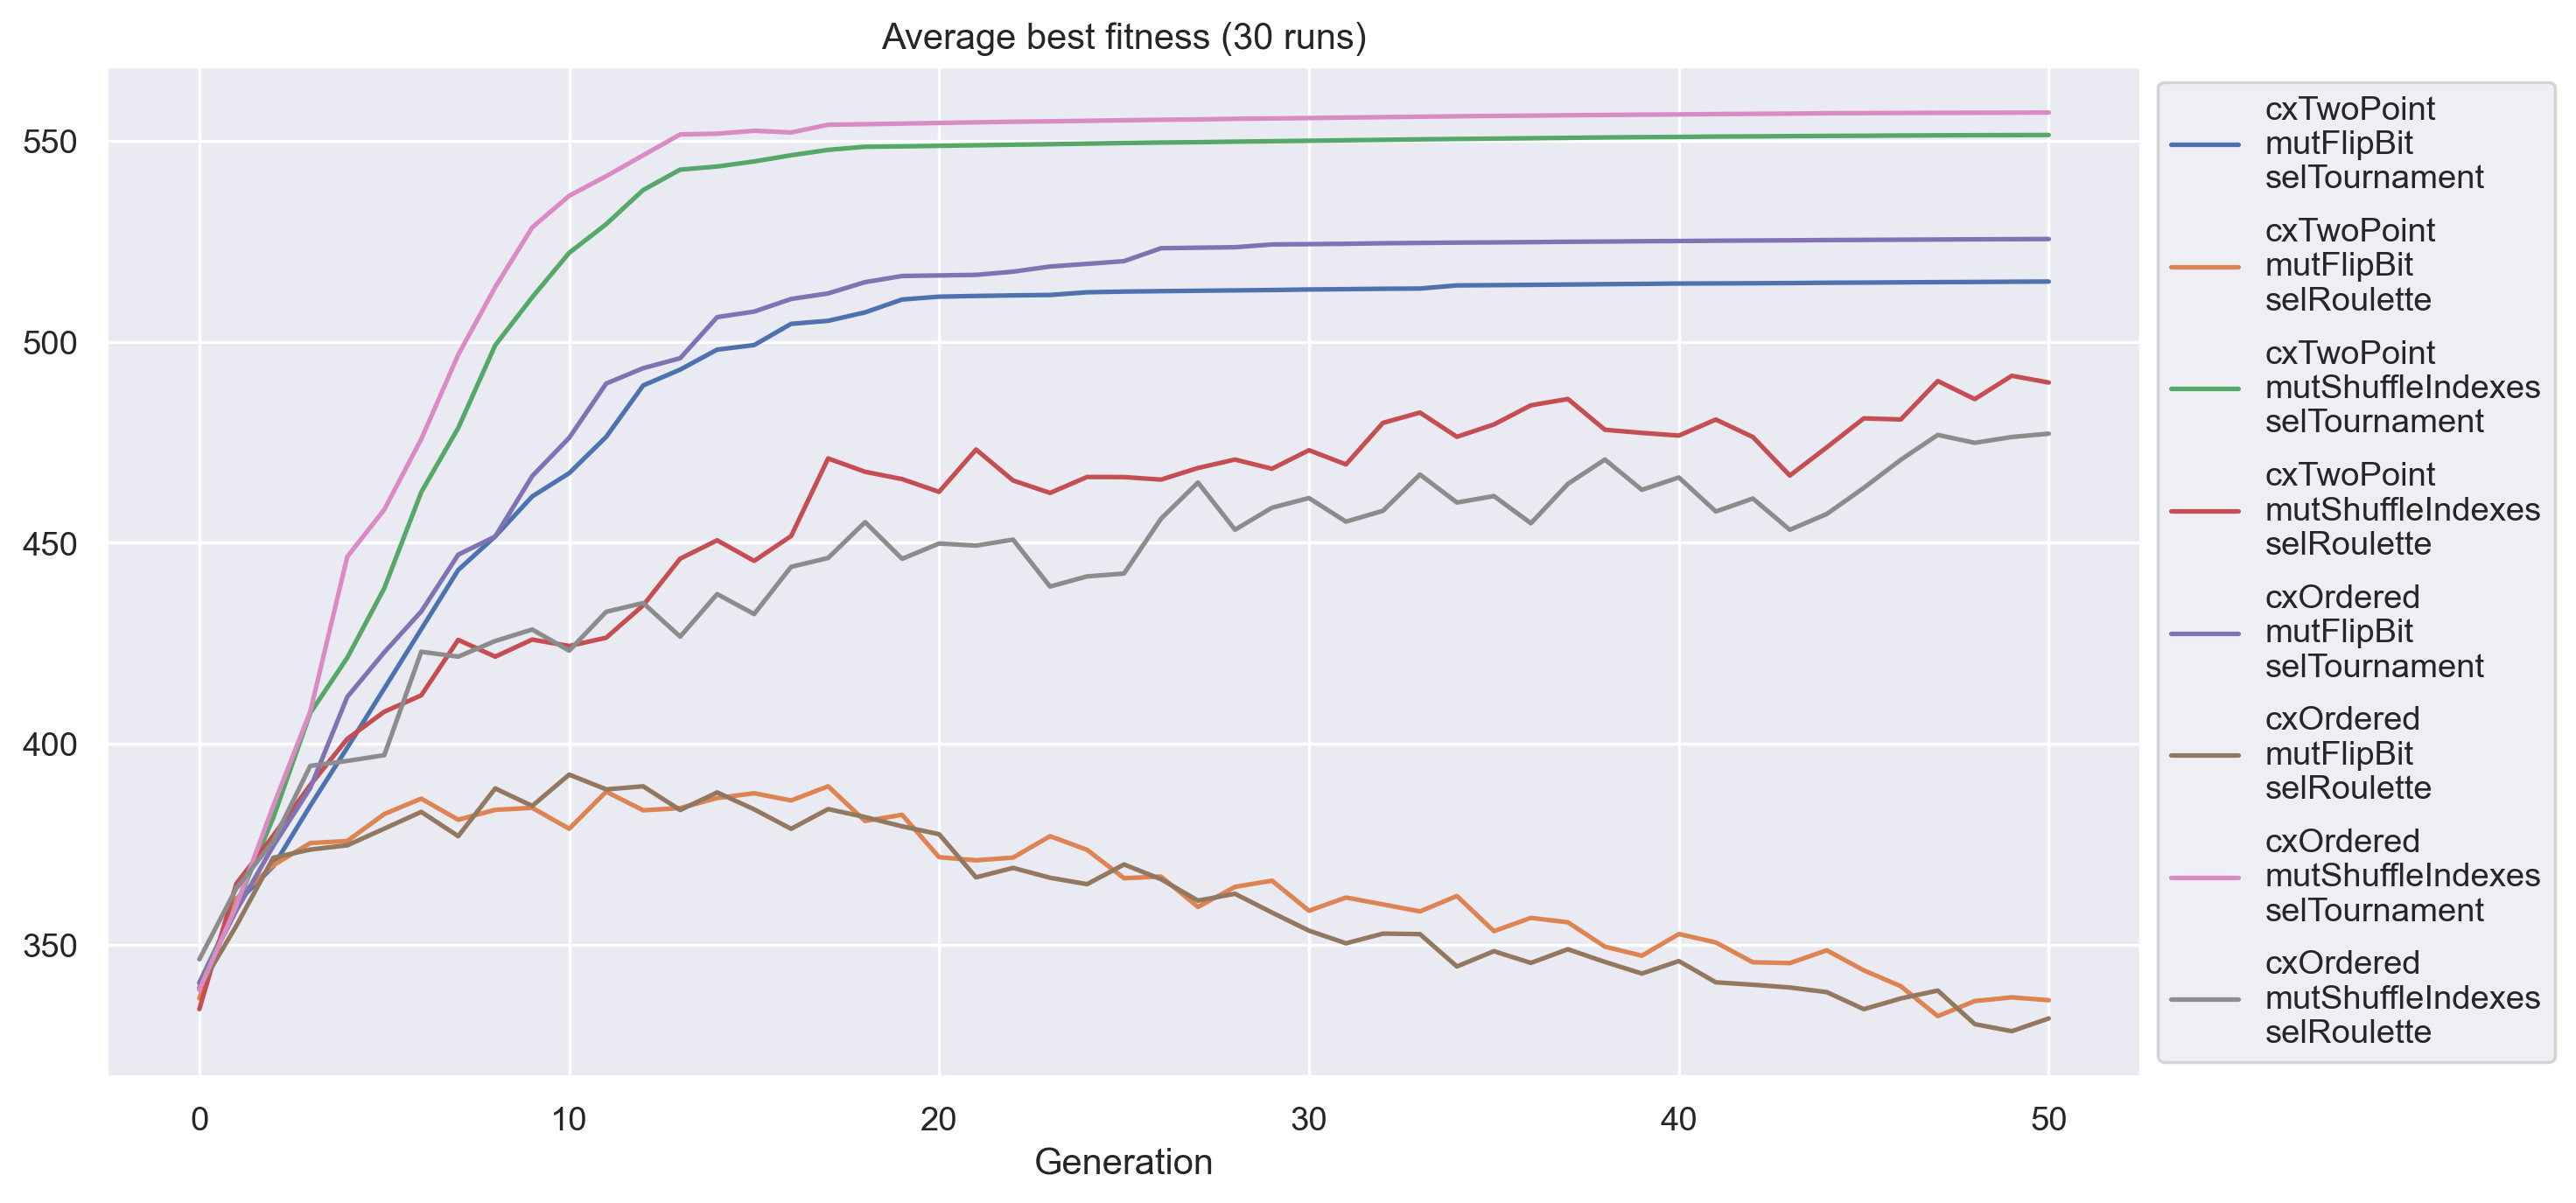

In [86]:
fig, ax = plt.subplots(dpi=250, figsize=(12, 6))
ax.set_title("Average best fitness (30 runs)")
ax.set_xlabel("Generation")

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            best_fitness_runs = np.array([run["logbook"].select("max") for run in runs])
            abf = best_fitness_runs.mean(axis=0)

            ax.plot(
                abf, 
                label=f"{crossover_op['function'].__name__}\n{mutation_op['function'].__name__}\n{selection_op['function'].__name__}"
            )

ax.legend(loc="center left", ncols=1, bbox_to_anchor=(1, 0.5), labelspacing=0.7)
fig.savefig("plots/exercise-2-abf.png", bbox_inches="tight")

### Make boxplot of best fitness distribution of each combination

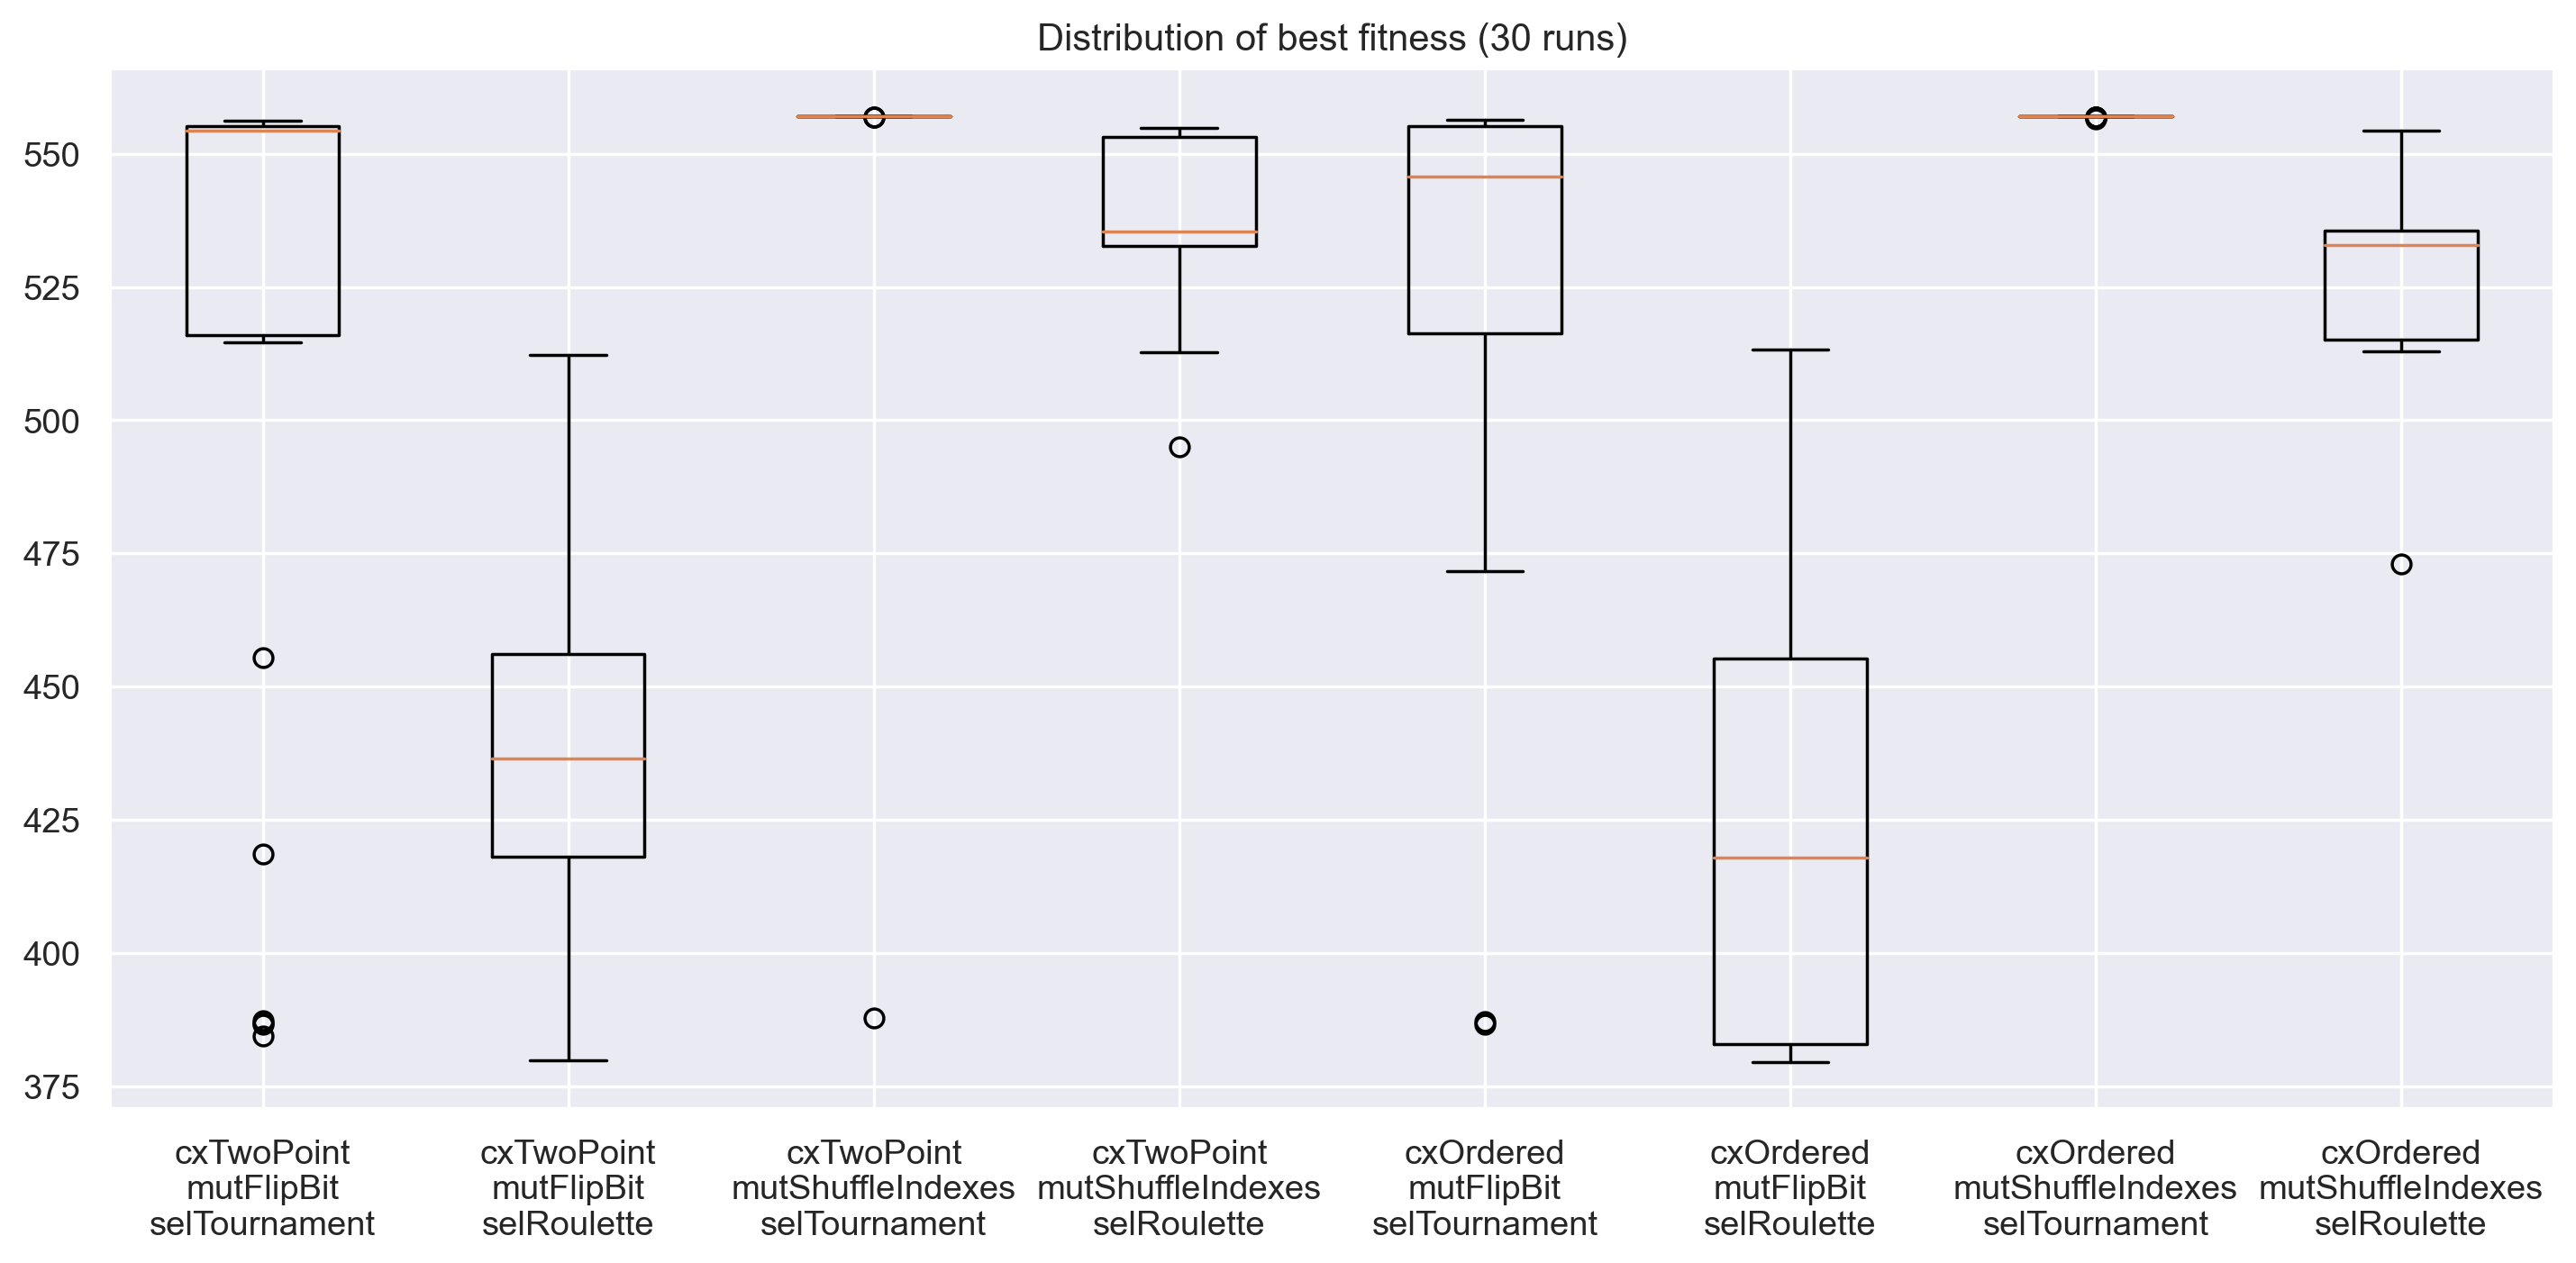

In [72]:
fig, ax = plt.subplots(dpi=250, figsize=(14, 6))
ax.set_title("Distribution of best fitness (30 runs)")

data = []
xticklabels = []

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            data.append([run["best_fitness"] for run in runs])
            xticklabels.append(
                f"{crossover_op['function'].__name__}\n"
                f"{mutation_op['function'].__name__}\n"
                f"{selection_op['function'].__name__}"
            )

ax.boxplot(data)
ax.set_xticklabels(xticklabels)
fig.savefig("plots/exercise-2-boxplot.png", bbox_inches="tight")

## Exercise 3